# Phase 4 Code Challenge

This code challenge is designed to test your understanding of the Phase 4 material. It covers:

* Principal Component Analysis
* Clustering
* Time Series
* Natural Language Processing

_Read the instructions carefully_. You will be asked both to write code and to answer short answer questions.

## Code Tests

We have provided some code tests for you to run to check that your work meets the item specifications. Passing these tests does not necessarily mean that you have gotten the item correct - there are additional hidden tests. However, if any of the tests do not pass, this tells you that your code is incorrect and needs changes to meet the specification. To determine what the issue is, read the comments in the code test cells, the error message you receive, and the item instructions.

## Short Answer Questions 

For the short answer questions...

* _Use your own words_. It is OK to refer to outside resources when crafting your response, but _do not copy text from another source_.

* _Communicate clearly_. We are not grading your writing skills, but you can only receive full credit if your teacher is able to fully understand your response. 

* _Be concise_. You should be able to answer most short answer questions in a sentence or two. Writing unnecessarily long answers increases the risk of you being unclear or saying something incorrect.

In [2]:
# Run this cell without changes to import the necessary libraries

from numbers import Number
import matplotlib, sklearn, scipy, pickle
import numpy as np
import pandas as pd

%matplotlib inline

---

## Part 1: Principal Component Analysis [Suggested Time: 15 minutes]

---

In this part, you will use Principal Component Analysis on the wine dataset. 

In [3]:
# Run this cell without changes

# Relevant imports
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
wine = load_wine()
X, y = load_wine(return_X_y=True)
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'class'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scaling
scaler_1 = StandardScaler()
X_train_scaled = pd.DataFrame(scaler_1.fit_transform(X_train), columns=X_train.columns)

# Inspect the first five rows of the scaled dataset
X_train_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.104538,-0.530902,-0.136257,-0.374157,-1.294014,-1.017096,-0.444344,1.266120,0.159532,-1.074295,0.516454,-0.418240,-0.851947
1,-0.608849,-0.792240,-0.573221,-0.217310,4.793609,0.421716,0.331268,-0.403193,2.946675,-0.990146,0.856550,0.076074,0.739762
2,1.170548,-0.471890,1.611596,-0.091832,0.660038,1.141122,1.036369,0.014135,0.363469,-0.190727,1.239159,1.133355,0.663137
3,-1.371448,1.559801,0.118638,0.410080,-1.218858,0.997241,1.096806,-1.321315,2.317869,-0.905997,-0.886446,1.462898,-1.200242
4,-0.443619,0.000204,-0.573221,-0.374157,-0.316988,-0.985122,-1.290465,2.184241,-1.030103,0.903214,-0.971470,-1.365674,-0.103112


### 1.1) Create a PCA object `wine_pca` and fit it using `X_train_scaled`.

Use parameter defaults with `n_components=0.9` and `random_state=1` for your classifier. You must use the Scikit-learn PCA (docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)).

**Starter Code**

    wine_pca = PCA(

In [6]:
wine_pca = PCA(n_components= 0.9, random_state= 1)
wine_pca.fit(X_train_scaled)
#raise NotImplementedError()

PCA(n_components=0.9, random_state=1)

In [7]:
# This test confirms that you have created a PCA object named wine_pca

assert type(wine_pca) == PCA

# This test confirms that you have set random_state to 1

assert wine_pca.get_params()['random_state'] == 1

# This test confirms that wine_pca has been fit

sklearn.utils.validation.check_is_fitted(wine_pca)


### 1.2) Create a numeric variable `wine_pca_ncomps` containing the number of components in `wine_pca`

_Hint: Look at the list of attributes of trained `PCA` objects in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)_

**Starter Code**

    wine_pca_ncomps = 

In [11]:
wine_pca_ncomps = wine_pca.n_components_
#raise NotImplementedError()

In [12]:
# This test confirms that you have created a numeric variable named wine_pca_ncomps

assert isinstance(wine_pca_ncomps, Number)


### 1.3) Short Answer: Is PCA more useful or less useful when you have high multicollinearity among your features? Explain why.

Yes PCA is important when dealing with highly multicollinearity. It preserves the essential information while addressing challenges posed by multicollinearity

--- 

## Part 2: Clustering [Suggested Time: 20 minutes]

---

In this part, you will answer general questions about clustering.

In [13]:
# Run this cell without changes

from sklearn.cluster import KMeans

### 2.1) Short Answer: Describe the steps of the k-means clustering algorithm.

Hint: Refer to the animation below, which visualizes the process.

<img src='https://raw.githubusercontent.com/learn-co-curriculum/dsc-cc-images/main/phase_4/centroid.gif'>

YOUR ANSWER HERE

### 2.2) Write a function `get_labels()` that meets the requirements below to find `k` clusters in a dataset of features `X`, and return the cluster assignment labels for each row of `X`. 

Review the doc-string in the function below to understand the requirements of this function.

_Hint: Within the function, you'll need to:_
* instantiate a [scikit-learn KMeans object](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), using `random_state = 1` for reproducibility
* fit the object to the data
* return the cluster assignment labels for each row of `X` 

**Starter Code** - replace None with appropriate code

    def get_labels(k, X):
        """ 
        Finds the labels from a k-means clustering model 

        Parameters: 
        -----------
        k: float object
            number of clusters to use in the k-means clustering model
        X: Pandas DataFrame or array-like object
            Data to cluster

        Returns: 
        --------
        labels: array-like object
            Labels attribute from the k-means model

        """

        # Instantiate a k-means clustering model with random_state=1 and n_clusters=k
        kmeans = None

        # Fit the model to the data
        None

        # Return the predicted labels for each row in the data produced by the model
        return None

In [16]:
def get_labels(k, X):
    """ 
    Finds the labels from a k-means clustering model 

    Parameters: 
    -----------
    k: int
        number of clusters to use in the k-means clustering model
    X: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the k-means model

    """

    # Instantiate a k-means clustering model with random_state=1 and n_clusters=k
    kmeans = KMeans(n_clusters=k, random_state=1)

    # Fit the model to the data
    k_labels = kmeans.fit(X)

    # Return the predicted labels for each row in the data produced by the model
    return k_labels.labels_
#raise NotImplementedError()

In [17]:
# This test confirms that you have created a function named get_labels

assert callable(get_labels) 

# This test confirms that get_labels can take the correct parameter types

get_labels(1, np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]]))


/home/ezra_analytics/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0], dtype=int32)

The next cell uses your `get_labels` function to cluster the wine data, looping through all $k$ values from 2 to 9. It saves the silhouette scores for each $k$ value in a list `silhouette_scores`.

In [18]:
# Run this cell without changes

from sklearn.metrics import silhouette_score

# Preprocessing is needed. Scale the data
scaler_2 = StandardScaler()
X_scaled = scaler_2.fit_transform(X)

# Create empty list for silhouette scores
silhouette_scores = []

# Range of k values to try
k_values = range(2, 10)

for k in k_values:
    labels = get_labels(k, X_scaled)
    score = silhouette_score(X_scaled, labels, metric='euclidean')
    silhouette_scores.append(score)

/home/ezra_analytics/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ezra_analytics/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ezra_analytics/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ezra_analytics/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

Next, we plot the silhouette scores obtained for each different value of $k$, against $k$, the number of clusters we asked the algorithm to find. 

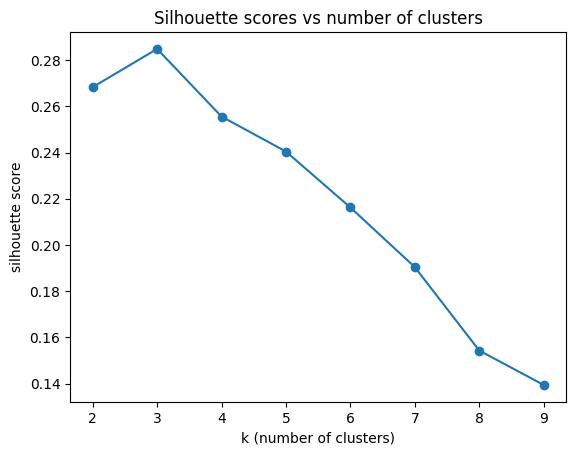

In [19]:
# Run this cell without changes

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score');

### 2.3) Create numeric variable `wine_nclust` containing the value of $k$ you would choose based on the above plot of silhouette scores. 

**Starter Code**

    wine_nclust = 

In [20]:
wine_nclust = 3
#raise NotImplementedError()

In [21]:
# This test confirms that you have created a numeric variable named wine_nclust

assert isinstance(wine_nclust, Number) 


---

## Part 3: Natural Language Processing [Suggested Time: 20 minutes]

---

In this third section we will attempt to classify text messages as "SPAM" or "HAM" using TF-IDF Vectorization.

In [22]:
# Run this cell without changes

# Import necessary libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

# Generate a list of stopwords 
nltk.download('stopwords')
stops = stopwords.words('english') + list(string.punctuation)

# Read in data
df_messages = pd.read_csv('./spam.csv', usecols=[0,1])

# Convert string labels to 1 or 0 
le = LabelEncoder()
df_messages['target'] = le.fit_transform(df_messages['v1'])

# Examine our data
print(df_messages.head())

# Separate features and labels 
X = df_messages['v2']
y = df_messages['target']

# Create test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)

     v1                                                 v2  target
0   ham  Go until jurong point, crazy.. Available only ...       0
1   ham                      Ok lar... Joking wif u oni...       0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...       1
3   ham  U dun say so early hor... U c already then say...       0
4   ham  Nah I don't think he goes to usf, he lives aro...       0


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ezra_analytics/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 3.1) Create CSR matrices `tf_idf_train` and `tf_idf_test` by using a `TfidfVectorizer` with stop word list `stops` to vectorize `X_train` and `X_test`, respectively.

Besides using the stop word list, use paramater defaults for your TfidfVectorizer. Refer to the documentation about [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

**Starter Code** 

    vectorizer = 

    tf_idf_train = 

    tf_idf_test = 

In [34]:
vectorizer = TfidfVectorizer(stop_words= stops)

# Fit and transform the training data
tf_idf_train = vectorizer.fit_transform(X_train)
# Transform the testing data 
tf_idf_test = vectorizer.transform(X_test)
#raise NotImplementedError()

In [35]:
# These tests confirm that you have created CSR matrices tf_idf_train and tf_idf_test

assert type(tf_idf_train) == scipy.sparse.csr.csr_matrix
assert type(tf_idf_test) == scipy.sparse.csr.csr_matrix


/tmp/ipykernel_4423/1673240130.py:3: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  assert type(tf_idf_train) == scipy.sparse.csr.csr_matrix
/tmp/ipykernel_4423/1673240130.py:4: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  assert type(tf_idf_test) == scipy.sparse.csr.csr_matrix


### 3.2) Create an array `y_preds` containing predictions from an untuned `RandomForestClassifier` that uses `tf_idf_train` and `tf_idf_test`.

Use parameter defaults with `random_state=1` for your classifier. Refer to the documentation on [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

**Starter Code**

    classifier = 
    
    y_preds = 

In [38]:
#instantiating the classifier
classifier = RandomForestClassifier(random_state= 1)
#fitting the training data
classifier.fit(tf_idf_train, y_train)
#predictions
y_preds =classifier.predict(tf_idf_test)
#raise NotImplementedError()

In [39]:
# This test confirms that you have created an array named y_preds

assert type(y_preds) == np.ndarray


### 3.3) Short Answer: What would it mean if the word "genuine" had the highest TF-IDF value of all words in one document from our test data?


This would indicate that the word `genuine` is important in that specific document unlike the rest of the words in the corpus.

---

## Part 4: Time Series [Suggested Time: 20 minutes]

---
In this part you will analyze the price of one stock over time. Each row of the dataset has four prices tracked for each day: 

* Open: The price when the market opens.
* High: The highest price over the course of the day.
* Low: The lowest price over the course of the day.
* Close: The price when the market closes.

<!---Create stock_df and save as .pkl
stocks_df = pd.read_csv("raw_data/all_stocks_5yr.csv")
stocks_df["clean_date"] = pd.to_datetime(stocks_df["date"], format="%Y-%m-%d")
stocks_df.drop(["date", "clean_date", "volume", "Name"], axis=1, inplace=True)
stocks_df.rename(columns={"string_date": "date"}, inplace=True)
pickle.dump(stocks_df, open("write_data/all_stocks_5yr.pkl", "wb"))
--->

In [40]:
# Run this cell without changes

stocks_df = pd.read_csv('./stocks_5yr.csv')
stocks_df.head()

,open,high,low,close,date
0,15.07,15.12,14.63,14.75,"February 08, 2013"
1,14.89,15.01,14.26,14.46,"February 11, 2013"
2,14.45,14.51,14.10,14.27,"February 12, 2013"
3,14.30,14.94,14.25,14.66,"February 13, 2013"
4,14.94,14.96,13.16,13.99,"February 14, 2013"


### 4.1) For `stocks_df`, create a DatetimeIndex from the `date` column.

The resulting DataFrame should not have a `date` column, only `open`, `high`, `low`, and `close` columns. 

Hint: First convert the `date` column to Datetime datatype, then set it as the index.

**Starter Code**

    stocks_df['date'] =

In [41]:
stocks_df["date"] = pd.to_datetime(stocks_df["date"])
stocks_df.set_index("date", inplace= True)
#raise NotImplementedError()

In [42]:
# This test confirms that stocks_df has a DatetimeIndex

assert type(stocks_df.index) == pd.core.indexes.datetimes.DatetimeIndex

# This test confirms that stocks_df only has `open`, `high`, `low`, and `close` columns.

assert list(stocks_df.columns) == ['open', 'high', 'low', 'close']


### 4.2) Create a DataFrame `stocks_monthly_df` that resamples `stocks_df` each month with the 'MS' DateOffset to calculate the mean of the four features over each month.

Refer to the [resample documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html).

**Starter Code**
    
    stocks_monthly_df = 

In [44]:
stocks_monthly_df = stocks_df.resample("MS").mean()
#raise NotImplementedError()

In [45]:
# This test confirms that you have created a DataFrame named stocks_monthly_df

assert type(stocks_monthly_df) == pd.DataFrame

# This test confirms that stocks_monthy_df has the correct dimensions

assert stocks_monthly_df.shape == (61,4)


### 4.3) Create a matplotlib figure `rolling_open_figure` containing a line graph that visualizes the rolling quarterly mean of open prices from `stocks_monthly_df`.

You will use this graph to determine whether the average monthly open stock price is stationary or not.

Hint: use a window size of 3 to represent one quarter of a year

**Starter Code**

    rolling_open_figure, ax = plt.subplots(figsize=(10, 6))

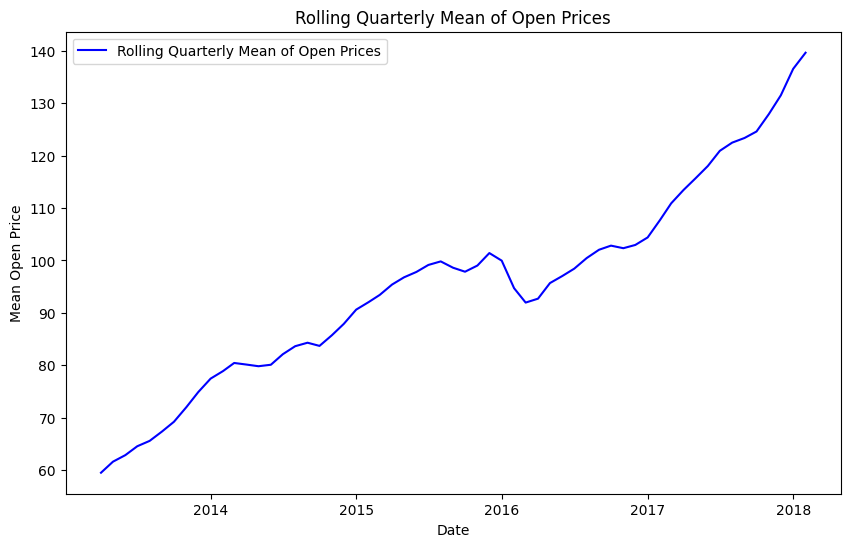

In [47]:
# rolling quarterly mean 
rolling_open = stocks_monthly_df['open'].rolling(window=3).mean()

# matplotlib figure and axis
rolling_open_figure, ax = plt.subplots(figsize=(10, 6))

# Plot 
ax.plot(rolling_open, label='Rolling Quarterly Mean of Open Prices', color='blue')

# Set axis labels and a legend
ax.set_xlabel('Date')
ax.set_ylabel('Mean Open Price')
ax.set_title('Rolling Quarterly Mean of Open Prices')
ax.legend()

plt.show()
#raise NotImplementedError()

In [48]:
# This test confirms that you have created a figure named rolling_open_figure

assert type(rolling_open_figure) == plt.Figure

# This test confirms that the figure contains exactly one axis

assert len(rolling_open_figure.axes) == 1


### 4.4) Short Answer: Based on your graph from Question 4.3, does the monthly open stock price look stationary? Explain your answer.



Based on the graph the monthly open stock price does not appear to be stationary. There is an upward trend observed in the line graph, where by the mean price tends to increase from around over time, indicating a clear non-stationary behavior.